In [1]:
using Plots
# using Revise
using LatticeQM

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Info: Precompiling LatticeQM [606d2a7e-9b17-11e9-1c5c-455b84f60309]
└ @ Base loading.jl:1317


In [ ]:
?LatticeQM

# Tutorial: Lattices

A lattice is characterized by a set of lattice vectors $\vec{a}_1$, $\dots$, $\vec{a}_d$ in real space $\mathbb{R}^{D>d}$. If $d<D$, we can always find additional basis vectors to span the space that is not covered by the lattice, i.e. $\vec{e}_{d+1}$, $\dots$, $\vec{e}_D$.

These lattice vectors define a *primitive unit cell* that contains a finite number $N$ of atoms/orbitals at positions $\vec{r}_1$, $\dots$, $\vec{r}_N$. These positions can be written in *fractional coordinates* as $\vec{r}_i = \sum_{j=1}^d x_j \vec{a}_j + \sum_{j=d+1}^D x_j \vec{e}_j$.

In [3]:
using LatticeQM.Structure.Lattices: Lattice, addbasis!, addorbital!, addorbitals!, addextra!

In [14]:
## Define real-space basis
lat = Lattice() # 0D lattice
addbasis!(lat, [1,0,0]) # 1D lattice
addbasis!(lat, [0,1,0]) # 2D lattice
addbasis!(lat, [0,0,1], :finite) # 2D lattice with z-coordinates
addextra!(lat, "sublattice") # non-spatial coordinate

## Adding atoms/orbitals to the lattice
addorbital!(lat, [0,   0,  -1, 0]) # must be vector of correct length (here 2 + 1 + 1)
addorbital!(lat, [1/2, 1/2, 1, 1])

Lattice dimension:     2
Space dimension:       3
Number of atoms:       2
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
Orbital/atom coordinates: 
4×2 Matrix{Float64}:
  0.0  0.5
  0.0  0.5
 -1.0  1.0
  0.0  1.0

In [5]:
## Short version
lat = Lattice([[1,0,0] [0,1,0] [0, 0, 1]]; periodic=2, extra=["sublattice"])
addorbitals!(lat, [[0,   0,  -1, 0] [1/2, 1/2, 1, 1]]) # must be matrix with coordinates as columns

## Shorter version
lat = Lattice(2,3; extra=["sublattice"]) # 2D lattice in 3D space with 1 extra coordinate "sublattice"
addorbitals!(lat, [[0,   0,  -1, 0] [1/2, 1/2, 1, 1]]) # must be matrix with coordinates as columns


Lattice dimension:     3
Space dimension:       3
Number of atoms:       2
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
Orbital/atom coordinates: 
4×2 Matrix{Float64}:
  0.0  0.5
  0.0  0.5
 -1.0  1.0
  0.0  1.0

In [6]:
kpoints = Dict(
    "Γ" => [ [0.0; 0.0], "\$\\Gamma\$" ],
    "M1" => [ [1/2;  0.0], "M"],
    "M2" => [ [0.0;  1/2], "M'"],
    "Z" =>  [ [1/2;  1/2], "Z"]
)

Dict{String, Vector{Any}} with 4 entries:
  "Z"  => [[0.5, 0.5], "Z"]
  "M2" => [[0.0, 0.5], "M'"]
  "M1" => [[0.5, 0.0], "M"]
  "Γ"  => [[0.0, 0.0], "\$\\Gamma\$"]

# Pre-defined lattice objects

Lattice dimension:     2
Space dimension:       3
Number of atoms:       1
Non-spatial dimension: 0
Basis:
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
Orbital/atom coordinates: 
3×1 Matrix{Float64}:
 0.0
 0.0
 0.0

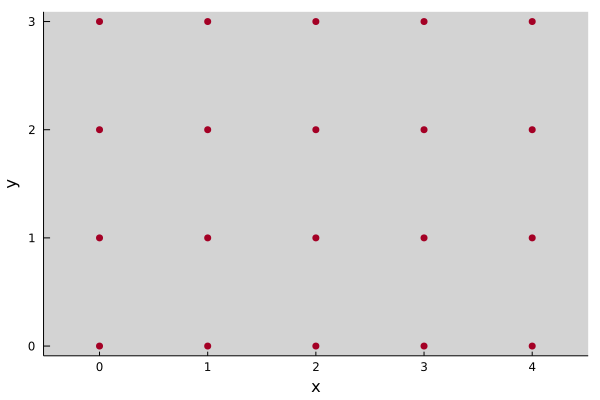

In [7]:
lat = Geometries2D.square()
display(lat)
plot(lat; supercell=[[2,0],[0,2]])

Lattice dimension:     2
Space dimension:       3
Number of atoms:       2
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
  1.5       1.5       0.0
 -0.866025  0.866025  0.0
  0.0       0.0       1.0
Orbital/atom coordinates: 
4×2 Matrix{Float64}:
 0.0  0.333333
 0.0  0.333333
 0.0  0.0
 0.0  1.0

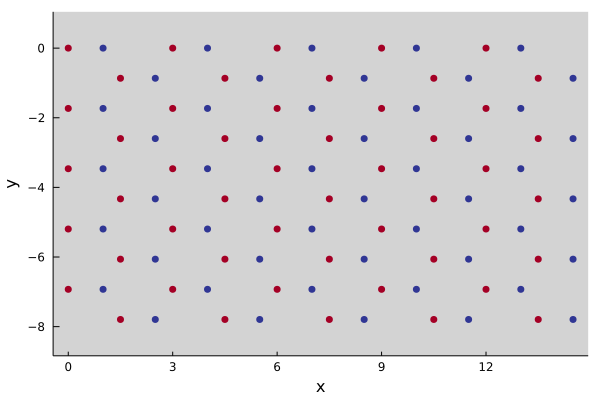

In [26]:
lat = Geometries2D.honeycomb()
slat = Structure.superlattice(lat, [[5, -5] [5, 5]])
display(lat)
plot(slat, "sublattice")

# Superlattice

Lattice dimension:     2
Space dimension:       3
Number of atoms:       12
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
  1.5       9.0      0.0
 -0.866025  5.19615  0.0
  0.0       0.0      1.0
Orbital/atom coordinates: 
4×12 Matrix{Float64}:
 0.0  0.333333   0.0       0.333333  …  0.333333  0.0       0.333333
 0.0  0.0555556  0.166667  0.222222     0.722222  0.833333  0.888889
 0.0  0.0        0.0       0.0          0.0       0.0       0.0
 0.0  1.0        0.0       1.0          1.0       0.0       1.0

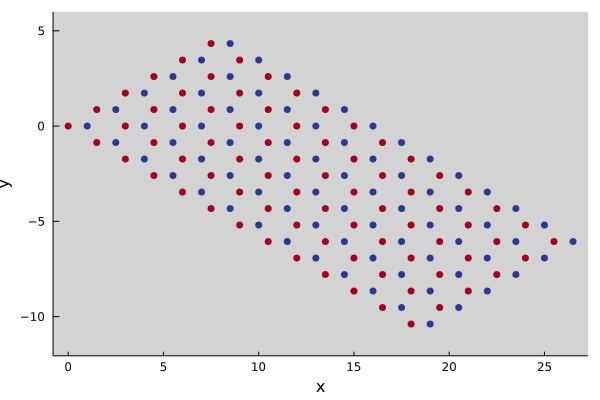

In [9]:
lat = Geometries2D.honeycomb()
slat = Structure.superlattice(lat, [[1, 0] [0, 6]])

display(slat)
plot(slat, "sublattice"; supercell=[12,0])

Lattice dimension:     2
Space dimension:       3
Number of atoms:       24
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
 3.0    0.0     0.0
 0.0  -10.3923  0.0
 0.0    0.0     1.0
Orbital/atom coordinates: 
4×24 Matrix{Float64}:
 0.0       0.333333  0.5       0.833333  …  0.333333     0.5        0.833333
 0.833333  0.833333  0.916667  0.916667     1.54198e-18  0.0833333  0.0833333
 0.0       0.0       0.0       0.0          0.0          0.0        0.0
 0.0       1.0       0.0       1.0          1.0          0.0        1.0

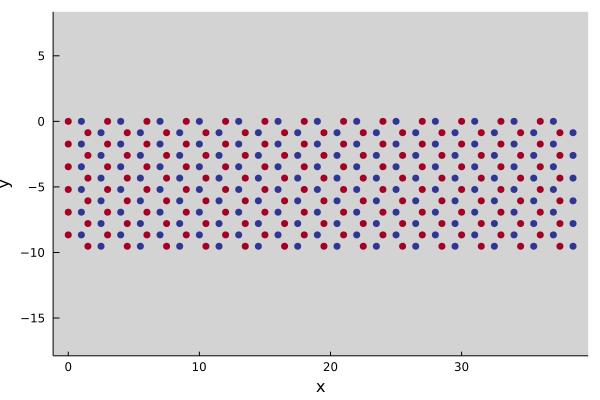

In [10]:
lat = Geometries2D.honeycomb()
slat = Structure.superlattice(lat, [[1, 1] [6, -6]])

display(slat)
plot(slat, "sublattice"; supercell=[12,0])

# Reducing lattice dimension

Lattice dimension:     1
Space dimension:       3
Number of atoms:       24
Non-spatial dimension: 1
Basis:
3×3 Matrix{Float64}:
 3.0    0.0     0.0
 0.0  -10.3923  0.0
 0.0    0.0     1.0
Orbital/atom coordinates: 
4×24 Matrix{Float64}:
 0.0       0.333333  0.5       0.833333  …  0.333333     0.5        0.833333
 0.833333  0.833333  0.916667  0.916667     1.54198e-18  0.0833333  0.0833333
 0.0       0.0       0.0       0.0          0.0          0.0        0.0
 0.0       1.0       0.0       1.0          1.0          0.0        1.0

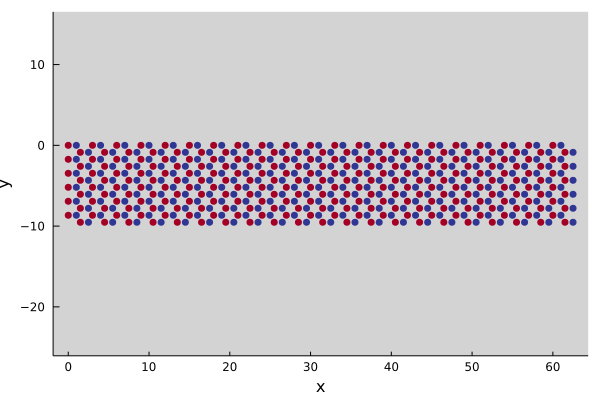

In [11]:
lat = Geometries2D.honeycomb()
lat_armchair = Structure.reduceto1D(lat, [[1, 1] [6, -6]])

display(lat_armchair)
plot(lat_armchair, "sublattice"; supercell=[20])

# Twisted lattices

In [12]:
lat = Geometries2D.honeycomb_twisted(10)

Twist α=3.15°   (n,m)=(10,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       1324
Non-spatial dimension: 2
Basis:
3×3 Matrix{Float64}:
 31.5119       15.756   0.0
 -1.35671e-14  27.2901  0.0
  0.0           0.0     1.0
Orbital/atom coordinates: 
5×1324 Matrix{Float64}:
 0.0  0.0322256  0.0332326  0.0654582  …   0.97281    0.939577   0.969789
 0.0  0.998993   0.0302115  0.0292044      0.870091   0.933535   0.966767
 1.5  1.5        1.5        1.5           -1.5       -1.5       -1.5
 0.0  1.0        0.0        1.0            0.0        0.0        0.0
 0.0  0.0        0.0        0.0            1.0        1.0        1.0

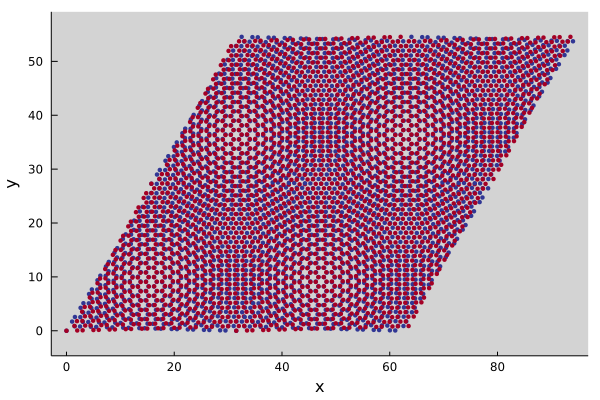

In [13]:
plot(lat, 3; supercell=1, markersize=2.5)